## <h3 align="center"> __Johns Hopkins University__</h3>
## <h3 align="center">__Whiting School of Engineering__</h3>
## <h3 align="center">__Engineering for Professionals__</h3>
## <h3 align="center">__685.621 Algorithms for Data Science__</h3>
## <h3 align="center">__Homework 2__</h3>
## <h3 align="center">__Assigned at the start of Module 3__</h3>
## <h3 align="center">__Due at the end of Module 5__</h3><br>
## <h3 align="center">__Total Points 100/100__</h3>
Class, the below is a standard set of instructions for each HW, in this assignment groups will be set up for collaboration.<br><br>
Make sure your group starts one thread for the collaborative problems. You are required to participate in the collaborative problem and subproblem separately. Please do not directly post a complete
solution, the goal is for the group to develop a solution after everyone has participated. Please ensure
you have a write-up with solutions to each problem and subproblems, you are also required to submit
code that will be compiled when grading the assignment. In each of the problems you are allowed to
use built-in functions.

# __1. Module 3 Note this is not a Collaborative Problem__<br>
*30 Points Total*<br><br>
In this problem use the seaborn Python package to create a scatter plot matrix of the Iris data set.
1. [10 points] Describe the diagonal curves.
2. [10 points] Does any feature separate the three classes? If so, which feature? If not, which is the closest?
3. [10 points] Is there any combination of features that can separate the three classes? If so, which features? If not, which are the closest?

Reference: https://seaborn.pydata.org/examples/scatterplot_matrix.html

In [1]:
## import libraries


## import iris dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the iris.csv file into a Pandas DataFrame
df = pd.read_csv('iris.csv')




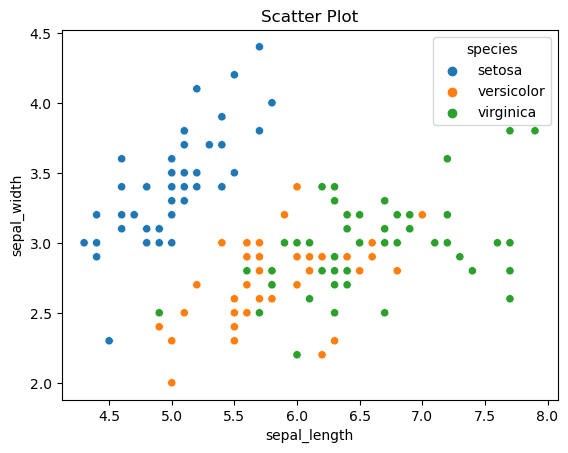

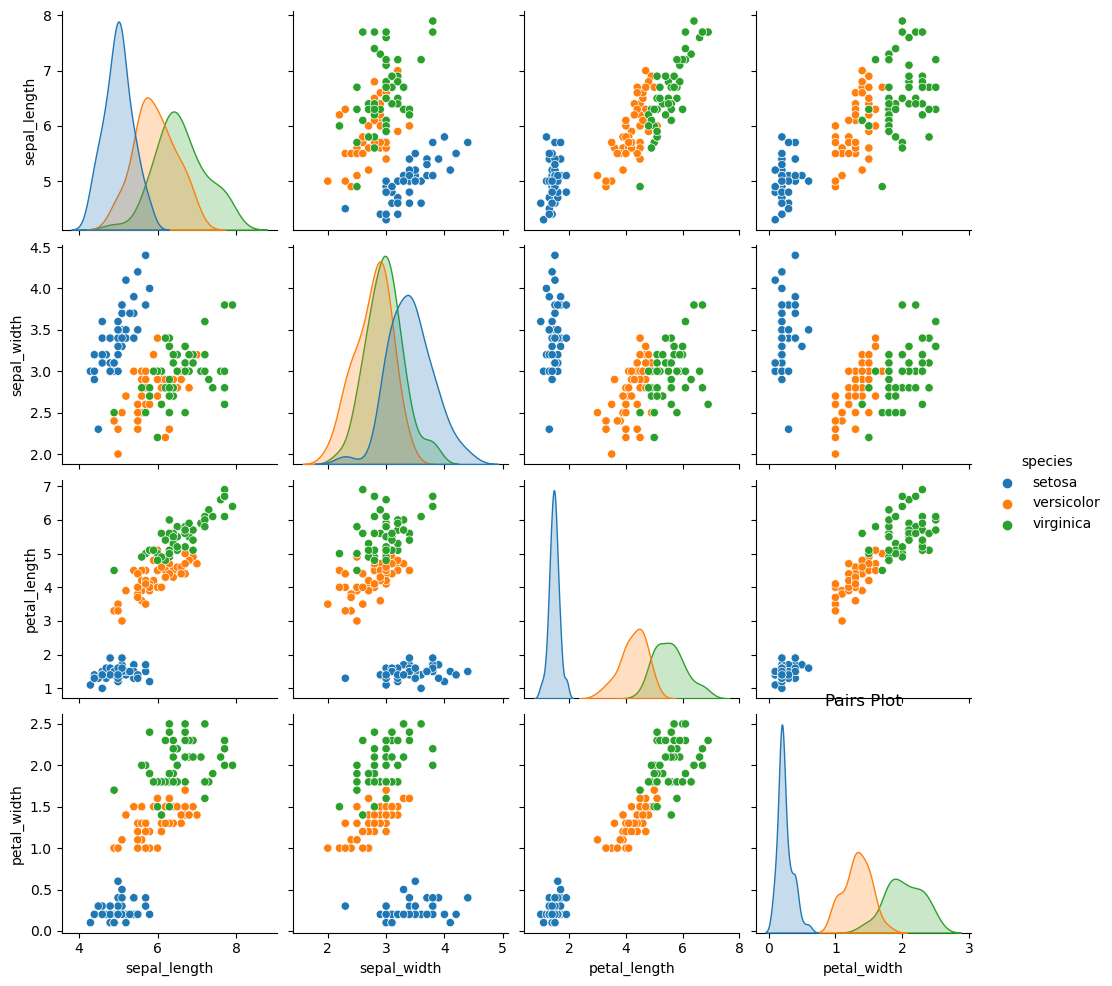

In [2]:
## Type code here for the part 1 ##
# Group the DataFrame by species
grouped_df = df.groupby('species')

# Create a scatter plot using Seaborn
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')
plt.title('Scatter Plot')
plt.show()

# Create a pairs plot using Seaborn
sns.pairplot(data=df, hue='species')
plt.title('Pairs Plot')
plt.show()

## Type response for part 1 here

Above I have put in an example scatter plot for one of the feature combinations, and a more comprehensive pairs plot for each of the features. On the diagonal, the colored curves represent the distribution(s) of the feature(s) by species. This allows us to look for seperation between means and tight variance within groups.

## Type response for part 2 here ##

Looking at the features, no one feature seperates the species completely, although petal_length and petal_width come close. They are our best candidates.

## Type response for part 3 here ##

Looking at the scatter plots we can see how combinations of features map according to species group. We can see the feature combinations of petal_length/sepal_length and petal_length/petal_width come the closest to a clean seperation between classes, but don't totally accomplish that.

# __2. Module 4 Note this is a Collaborative Problem__<br>
*30 Points Total*<br><br>
In this problem, implement code to use the Mahalanobis Distance on the Iris dataset. 
1. [10 points] Using all four features, calculate the 50 distances for the Setosa class.
2. [5 points] Calculate the range (min and max) of the 50 Mahalanobis distance values. What is the delta between the min and the max?
3. [10 points] If you remove the observation with the largest distance, do the remaining distances appear to be closer together? After removing the observation with the largest distance, recalculate the ranges with the updated mean and covariance. Does removing the observation with the largest Mahalanobis distance provide a smaller range between the min and max? 
4. [5 points] Given your findings, describe what was accomplished following the method above this data point from the dataset.

In [6]:
## Type code here for part 1 ##

import pandas as pd
import numpy as np

# Read the iris.csv file into a Pandas DataFrame
data = pd.read_csv('iris.csv')

# Filter the data to include only the Setosa class
setosa_data = data[data['species'] == 'setosa']

# Calculate the Mahalanobis distances for all four features
cov_matrix = np.cov(setosa_data.iloc[:, :-1].values.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)
mean = setosa_data.iloc[:, :-1].mean().values
distances = []
for i in range(len(setosa_data)):
    x = setosa_data.iloc[i, :-1].values
    distance = np.sqrt(np.dot(np.dot((x - mean), inv_cov_matrix), (x - mean).T))
    distances.append(distance)

# Create a DataFrame to store the features and distances
distances_df = setosa_data.iloc[:, :-1].copy()
distances_df['Mahalanobis Distance'] = distances


# Print the DataFrame
print(distances_df)


    sepal_length  sepal_width  petal_length  petal_width  Mahalanobis Distance
0            5.1          3.5           1.4          0.2              0.666984
1            4.9          3.0           1.4          0.2              1.393003
2            4.7          3.2           1.3          0.2              1.145901
3            4.6          3.1           1.5          0.2              1.292055
4            5.0          3.6           1.4          0.2              0.925226
5            5.4          3.9           1.7          0.4              1.919208
6            4.6          3.4           1.4          0.3              1.851936
7            5.0          3.4           1.5          0.2              0.540709
8            4.4          2.9           1.4          0.2              1.726287
9            4.9          3.1           1.5          0.1              1.664780
10           5.4          3.7           1.5          0.2              1.352153
11           4.8          3.4           1.6         

In [7]:
## Type code here for part 2 ##
# Calculate the range and delta of the Mahalanobis distances
distances_min = min(distances)
distances_max = max(distances)
delta = distances_max - distances_min

# Create a DataFrame to store the range and delta data
range_data = pd.DataFrame({'Minimum of Distance': [distances_min],
                           'Maximum of Distance': [distances_max],
                           'Delta': [delta]})

# Print the table of range and delta data
print(range_data)

   Minimum of Distance  Maximum of Distance    Delta
0             0.540709             3.553699  3.01299


In [12]:
## Type code here for part 3 ##

import pandas as pd
import numpy as np

# Read the iris.csv file into a Pandas DataFrame
data = pd.read_csv('iris.csv')

# Filter the data to include only the Setosa class
setosa_data = data[data['species'] == 'setosa']

# Calculate the Mahalanobis distances for all four features
cov_matrix = np.cov(setosa_data.iloc[:, :-1].values.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)
mean = setosa_data.iloc[:, :-1].mean().values
distances = []
for i in range(len(setosa_data)):
    x = setosa_data.iloc[i, :-1].values
    distance = np.sqrt(np.dot(np.dot((x - mean), inv_cov_matrix), (x - mean).T))
    distances.append(distance)

# Create a DataFrame to store the features and distances
distances_df = setosa_data.iloc[:, :-1].copy()
distances_df['Mahalanobis Distance'] = distances

# Find the index of the observation with the largest distance
largest_distance_idx = distances_df['Mahalanobis Distance'].idxmax()

# Remove the observation with the largest distance
distances_df = distances_df.drop(largest_distance_idx)

# Recalculate the mean and covariance with the updated data
updated_mean = distances_df.iloc[:, :-1].mean().values
updated_cov_matrix = np.cov(distances_df.iloc[:, :-1].values.T)
updated_inv_cov_matrix = np.linalg.inv(updated_cov_matrix)

# Calculate the Mahalanobis distances for the updated data
updated_distances = []
for i in range(len(distances_df)):
    x = distances_df.iloc[i, :-1].values
    updated_distance = np.sqrt(np.dot(np.dot((x - updated_mean), updated_inv_cov_matrix), (x - updated_mean).T))
    updated_distances.append(updated_distance)

# Create a DataFrame to store the updated distances
updated_distances_df = distances_df.iloc[:, :-1].copy()
updated_distances_df['Updated Mahalanobis Distance'] = updated_distances

# Calculate the range and delta of the original distances
distances_min = min(distances)
distances_max = max(distances)
delta = distances_max - distances_min

# Calculate the range and delta of the updated distances
updated_distances_min = updated_distances_df['Updated Mahalanobis Distance'].min()
updated_distances_max = updated_distances_df['Updated Mahalanobis Distance'].max()
updated_delta = updated_distances_max - updated_distances_min

# Print the results
print("Original Range:")
print("Minimum:", distances_min)
print("Maximum:", distances_max)
print("Delta:", delta)
print("\nUpdated Range:")
print("Minimum:", updated_distances_min)
print("Maximum:", updated_distances_max)
print("Delta:", updated_delta)




Original Range:
Minimum: 0.5407092054221374
Maximum: 3.55369889633244
Delta: 3.0129896909103024

Updated Range:
Minimum: 0.5183604874594571
Maximum: 3.5071667485336073
Delta: 2.98880626107415


## Type analysis for part 3 here ##
This question essentially combines 2.1 and 2.2 and adds an outlier removal according to Mahalanobis distance. I encountered some trouble with .max() so I had to take the maximum from a list to get the right result. I wonder if .max() was ever meant to be used with dataframes, and thus the critical importance of understanding the reasoning of the code which allowed me to spot the trouble function.

## Type response for part 4 here ##
Removing the outlier improved the dataset statistics (tighter variance) and made it better representative of the species. Wherever a mutant or a fluke in the data is possible, outliers can cloud the analysis.

# __3. Module 5 Note this is a Collaborative Problem__<br>
*40 Points Total*<br><br>

In this problem we would like to familiarize you with a basic example of a goal based agent. A game like rock paper scissors is typically played between two players and has a clearly defined set of rules for a win, draw, and loss. Since it is impossible (acknowledging that studies have been preformed to use behavior to attempt a prediction - but we will ignore that for the purpose of this exercise) to predict an opponent's move, we will assume that the user will input a value, the computer will see this input then choose from a set of rules the correct response play, acting as a simple goal based agent.<br>

Instructions on how to play: https://www.wikihow.com/Play-Rock,-Paper,-Scissors<br>

For this problem, you will fill in the rules (in if-then-else format) to the function in the cell below. The proceeding cell should then be run to play a game with the computer in which the computer agent should win every time.

In [13]:
## Set Rock = 1, Paper = 2, Scissors = 3
## The funtion should read in the player_move and return the appropriate agent_play that will win the round
import random
def goal_based_agent(player_move=None):
    # conditionals to beat player_move with agent_play
    if player_move == 1:  
        agent_play = 2  
    elif player_move == 2:  
        agent_play = 3  
    elif player_move == 3:  
        agent_play = 1  
    else:
        # Invalid input, default to random
        agent_play = random.randint(1, 3)

    return agent_play


In [14]:
## Set Rock = 1, Paper = 2, Scissors = 3
## The program will receive player input for the number of rounds to be played: suggested to use 5 so that you may test your implementation
import sys

num_rounds = int(input("Enter number of rounds to be played: "))
curr_round = 1
win_counter = 0 
while curr_round <= num_rounds:
    print("Enter choice \n 1 for Rock, \n 2 for paper, and \n 3 for scissor \n")
 
    # take the input from user
    player_move = int(input("User turn: "))
    
    if player_move == 1 or player_move == 2 or player_move == 3:
        if player_move == 1:
            choice_name = 'Rock'
        elif player_move == 2:
            choice_name = 'Paper'
        elif player_move == 3:
            choice_name = 'Scissor'
        
        print("Player move is: ", choice_name)

        AI_move = goal_based_agent(player_move) ## this is where your function is called, player_move which is an input is sent to your agent and returns the correct AI move

        if AI_move == 1:
            AI_play = 'Rock'
        elif AI_move == 2:
            AI_play = 'Paper'
        elif AI_move == 3:
            AI_play = 'Scissor'

        print("AI move is: ", AI_play)

        win = None
        if player_move == 1 and AI_move == 2:
            win = 1
        elif player_move == 2 and AI_move == 3:
            win = 1
        elif player_move == 3 and AI_move == 1:
            win = 1
        else:
            win = 0

        if win == 1:
            win_counter = win_counter + 1
            print("AI wins this round!")
        else:
            print("AI lost this round!")

        print("Round Number: ", curr_round)

        curr_round = curr_round + 1

    else:
        print("Invalid player input, GAME OVER")
        sys.exit(1)

print("\n\nGame Concluded")
print("Round Number: ", curr_round - 1)
print("Number of Wins: ", win_counter)
print("Number of Losses: ", curr_round - win_counter - 1)

if curr_round - win_counter == 1:
    print('Well done!')
else:
    print('You need to fix your goal based agnet!')
       




Enter number of rounds to be played: 5
Enter choice 
 1 for Rock, 
 2 for paper, and 
 3 for scissor 

User turn: 1
Player move is:  Rock
AI move is:  Paper
AI wins this round!
Round Number:  1
Enter choice 
 1 for Rock, 
 2 for paper, and 
 3 for scissor 

User turn: 2
Player move is:  Paper
AI move is:  Scissor
AI wins this round!
Round Number:  2
Enter choice 
 1 for Rock, 
 2 for paper, and 
 3 for scissor 

User turn: 3
Player move is:  Scissor
AI move is:  Rock
AI wins this round!
Round Number:  3
Enter choice 
 1 for Rock, 
 2 for paper, and 
 3 for scissor 

User turn: 3
Player move is:  Scissor
AI move is:  Rock
AI wins this round!
Round Number:  4
Enter choice 
 1 for Rock, 
 2 for paper, and 
 3 for scissor 

User turn: 1
Player move is:  Rock
AI move is:  Paper
AI wins this round!
Round Number:  5


Game Concluded
Round Number:  5
Number of Wins:  5
Number of Losses:  0
Well done!


# References
[1] Bishop, Christopher M., Pattern Recognition and Machine Learning, Springer, 2006,<br><br>
[2] Dillon, and Goldstein, M.. Multivariate Analysis Methods and Applications, John Wiley,
1984 https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-
and-Machine-Learning-2006.pdf<br><br>
[3] Duin, Robert P.W., Tax, David and Pekalska, Elzbieta, PRTools, http://prtools.tudelft.nl/<br><br>
[4] Fisher, R.A., The use of Multiple Measurements in Taxonomic Problems, Annals of Human
Genetics, Vol. 7, Issue 2, pp. 179-188, 1936<br><br>
[5] Hotelling, H., Analysis of a complex of statistical variables into principal components, Jour-
nal of Educational Psychology, Number 24, pp. 417–441, 1933<br><br>
[6] Rao, K. P. and Yip, P., Discrete Cosine Transform Algorithms, Advantages, Applications,
San Diego, CA: Academic Press, Inc., 1990